In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
filenames = ['transactions_1', 'transactions_2', 'transactions_3', 'users']

In [4]:
dataframes = [pd.read_csv('data/' + filename + '.csv') for filename in filenames]
transactions_1_df, transactions_2_df, transactions_3_df, users_df = dataframes

In [5]:
#merge transactions into 1 dataframe
transactions_df = pd.concat([transactions_1_df, transactions_2_df, transactions_3_df])

In [6]:
transactions_df.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652


In [13]:
transactions_df[transactions_df['transactions_state']=='COMPLETED'].count()

transaction_id           1916387
transactions_type        1916387
transactions_currency    1916387
amount_usd               1916387
transactions_state       1916387
ea_cardholderpresence    1060957
ea_merchant_mcc          1070144
ea_merchant_city         1070143
ea_merchant_country      1069943
direction                1916387
user_id                  1916387
created_date             1916387
dtype: int64

In [8]:
transactions_df.columns

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date'],
      dtype='object')

In [14]:
transactions_df.describe()

,amount_usd,ea_merchant_mcc
count,2.181026e+06,1.257051e+06
mean,1.189225e+05,5.703386e+03
std,6.955454e+07,9.480411e+02
min,0.000000e+00,7.420000e+02
25%,2.030000e+00,5.411000e+03
50%,8.510000e+00,5.812000e+03
75%,2.807000e+01,5.921000e+03
max,7.464155e+10,9.406000e+03


In [24]:
transactions_df_mcc = transactions_df.dropna(subset=['ea_merchant_mcc'])

In [25]:
transactions_df_mcc

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652
5,transaction_5,CARD_PAYMENT,AED,2.07,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_14318,2019-03-25 04:08:49.772652
6,transaction_6,CARD_PAYMENT,AED,10.44,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-17 17:57:06.816032
...,...,...,...,...,...,...,...,...,...,...,...,...
680983,transaction_2180983,CARD_PAYMENT,EUR,7.62,COMPLETED,FALSE,5541.0,Lemybrien,IRL,OUTBOUND,user_984,2019-04-30 05:41:11.457175
680984,transaction_2180984,ATM,EUR,85.11,COMPLETED,FALSE,6011.0,Co. Westmeath,IRL,OUTBOUND,user_380,2019-04-30 06:52:03.090307
680985,transaction_2180985,CARD_PAYMENT,EUR,20.90,COMPLETED,FALSE,5411.0,Dublin 4,IRL,OUTBOUND,user_14606,2019-04-30 22:04:15.206523
681002,transaction_2181002,CARD_PAYMENT,EUR,4.25,DECLINED,FALSE,5815.0,Stockholm,SWE,OUTBOUND,user_2186,2019-04-30 16:40:56.261952


In [15]:
def func(x):
    if x<=1499:
        return 'AGRICULTURAL SERVICES'
    elif x<=2999:
        return 'CONTRACTED SERVICES'
    elif x<=3999:
        return 'TRAVEL AND ENTERTAINMENT'
    elif x<=4799:
        return 'TRANSPORTATION SERVICES'
    elif x<=4999:
        return 'UTILITY SERVICES'
    elif x<=5599:
        return 'RETAIL OUTLET SERVICES'
    elif x<=5699:
        return 'CLOTHING STORES'
    elif x<=7299:
        return 'MISCELLANEOUS STORES'
    elif x<=7999:
        return 'BUSINESS SERVICES'
    elif x<=8999:
        return 'PROFESSIONAL SERVICES AND MEMBERSHIP ORGANIZATIONS'
    else:
        return 'GOVERNMENT SERVICES'

In [26]:
transactions_df_mcc['ea_merchant_mcc'] = transactions_df_mcc.apply(lambda x: func(x['ea_merchant_mcc']), axis=1)

<ipython-input-26-6f71278d0990>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_df_mcc['ea_merchant_mcc'] = transactions_df_mcc.apply(lambda x: func(x['ea_merchant_mcc']), axis=1)


In [143]:
transactions_df_mcc.sample(5)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
97572,transaction_1597572,CARD_PAYMENT,PLN,19.38,COMPLETED,FALSE,RETAIL OUTLET SERVICES,Spindleruv Ml,CZE,OUTBOUND,user_4705,2019-02-04 05:55:21.173983
153445,transaction_1653445,CARD_PAYMENT,CZK,23.15,COMPLETED,FALSE,MISCELLANEOUS STORES,Praha 1,CZE,OUTBOUND,user_8098,2018-11-03 12:47:14.793476
209991,transaction_209991,CARD_PAYMENT,GBP,2.55,COMPLETED,FALSE,MISCELLANEOUS STORES,7 West Ferry,GBR,OUTBOUND,user_2153,2019-03-09 06:36:53.168616
495333,transaction_495333,CARD_PAYMENT,PLN,0.00,REVERTED,FALSE,UTILITY SERVICES,Luxembourg,LUX,OUTBOUND,user_10717,2018-11-01 01:48:07.808380
630844,transaction_630844,CARD_PAYMENT,EUR,20.15,COMPLETED,FALSE,MISCELLANEOUS STORES,Brooklyn,USA,OUTBOUND,user_7857,2018-11-24 06:28:32.035606


In [28]:
transactions_df_mcc.isna().sum()

transaction_id              0
transactions_type           0
transactions_currency       0
amount_usd                  0
transactions_state          0
ea_cardholderpresence    9231
ea_merchant_mcc             0
ea_merchant_city          105
ea_merchant_country       264
direction                   0
user_id                     0
created_date                0
dtype: int64

<ipython-input-141-e499712bc21f>:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = plt.legend(patches, labels=label, loc=[-1, 0.3],  fontsize=8, title='Transactions by Merchant Category Code', )


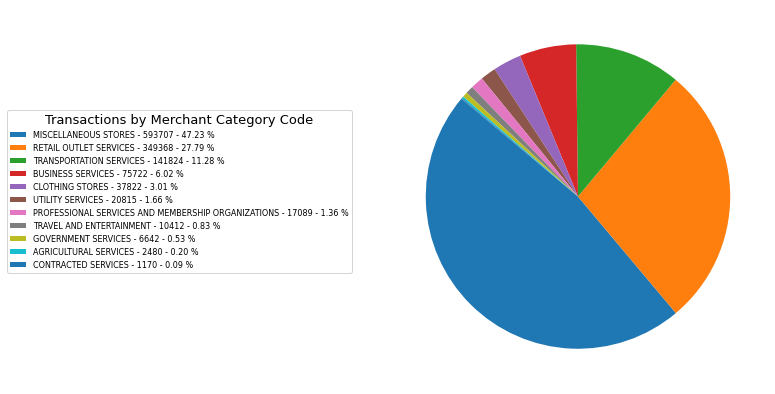

In [141]:
labels = transactions_df_mcc.ea_merchant_mcc.value_counts().index
values = transactions_df_mcc.ea_merchant_mcc.value_counts().values


plt.figure(figsize=(7, 7))

percent = 100.*values/values.sum()


patches, texts = plt.pie(values, textprops={'fontsize': 14}, startangle=140)
label = ['{0} - {1} - {2:1.2f} %'.format(i,j,k) for i,j,k in zip(labels, values, percent)]

legend = plt.legend(patches, labels=label, loc=[-1, 0.3],  fontsize=8, title='Transactions by Merchant Category Code', )
legend.get_title().set_fontsize('13')
plt.show();

In [144]:
transactions_df_mcc_completed = transactions_df_mcc[transactions_df_mcc['transactions_state']=='COMPLETED']

In [145]:
transactions_df_mcc_completed

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,TRANSPORTATION SERVICES,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,MISCELLANEOUS STORES,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,CLOTHING STORES,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652
5,transaction_5,CARD_PAYMENT,AED,2.07,COMPLETED,FALSE,TRANSPORTATION SERVICES,Dubai,ARE,OUTBOUND,user_14318,2019-03-25 04:08:49.772652
6,transaction_6,CARD_PAYMENT,AED,10.44,COMPLETED,FALSE,TRANSPORTATION SERVICES,Dubai,ARE,OUTBOUND,user_2355,2019-03-17 17:57:06.816032
...,...,...,...,...,...,...,...,...,...,...,...,...
680981,transaction_2180981,CARD_PAYMENT,EUR,36.60,COMPLETED,TRUE,TRANSPORTATION SERVICES,Taastrup,DNK,OUTBOUND,user_14457,2019-04-30 15:55:35.135119
680982,transaction_2180982,CARD_PAYMENT,EUR,1.75,COMPLETED,FALSE,RETAIL OUTLET SERVICES,Leuven,BEL,OUTBOUND,user_10534,2019-04-30 05:02:07.265755
680983,transaction_2180983,CARD_PAYMENT,EUR,7.62,COMPLETED,FALSE,RETAIL OUTLET SERVICES,Lemybrien,IRL,OUTBOUND,user_984,2019-04-30 05:41:11.457175
680984,transaction_2180984,ATM,EUR,85.11,COMPLETED,FALSE,MISCELLANEOUS STORES,Co. Westmeath,IRL,OUTBOUND,user_380,2019-04-30 06:52:03.090307


In [148]:
transactions_df_mcc_completed.drop(columns=['amount_usd', 'transaction_id', 'transactions_type', 'transactions_currency', 'transactions_state', 'ea_cardholderpresence', 'ea_merchant_city', 'ea_merchant_country'], axis=1, inplace=True)

c:\users\christodoulos\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [153]:
transactions_df_mcc_completed

,ea_merchant_mcc,direction,user_id,created_date
1,TRANSPORTATION SERVICES,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,MISCELLANEOUS STORES,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
4,CLOTHING STORES,OUTBOUND,user_14318,2019-03-22 05:42:50.316652
5,TRANSPORTATION SERVICES,OUTBOUND,user_14318,2019-03-25 04:08:49.772652
6,TRANSPORTATION SERVICES,OUTBOUND,user_2355,2019-03-17 17:57:06.816032
...,...,...,...,...
680981,TRANSPORTATION SERVICES,OUTBOUND,user_14457,2019-04-30 15:55:35.135119
680982,RETAIL OUTLET SERVICES,OUTBOUND,user_10534,2019-04-30 05:02:07.265755
680983,RETAIL OUTLET SERVICES,OUTBOUND,user_984,2019-04-30 05:41:11.457175
680984,MISCELLANEOUS STORES,OUTBOUND,user_380,2019-04-30 06:52:03.090307


In [154]:
transactions_df_mcc_completed.dtypes

ea_merchant_mcc    object
direction          object
user_id            object
created_date       object
dtype: object

In [155]:
transactions_df_mcc_completed['created_date']=pd.to_datetime(transactions_df_mcc_completed['created_date'], format='%Y/%m/%d')

<ipython-input-155-b3a441310566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_df_mcc_completed['created_date']=pd.to_datetime(transactions_df_mcc_completed['created_date'], format='%Y/%m/%d')


In [158]:
transactions_df_mcc_completed

,ea_merchant_mcc,direction,user_id,created_date
1,TRANSPORTATION SERVICES,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,MISCELLANEOUS STORES,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
4,CLOTHING STORES,OUTBOUND,user_14318,2019-03-22 05:42:50.316652
5,TRANSPORTATION SERVICES,OUTBOUND,user_14318,2019-03-25 04:08:49.772652
6,TRANSPORTATION SERVICES,OUTBOUND,user_2355,2019-03-17 17:57:06.816032
...,...,...,...,...
680981,TRANSPORTATION SERVICES,OUTBOUND,user_14457,2019-04-30 15:55:35.135119
680982,RETAIL OUTLET SERVICES,OUTBOUND,user_10534,2019-04-30 05:02:07.265755
680983,RETAIL OUTLET SERVICES,OUTBOUND,user_984,2019-04-30 05:41:11.457175
680984,MISCELLANEOUS STORES,OUTBOUND,user_380,2019-04-30 06:52:03.090307


In [167]:
transaction_dates = transactions_df_mcc_completed[['user_id','created_date']]

In [169]:
transaction_time= transaction_dates.groupby('user_id').max()['created_date'] - transaction_dates.groupby('user_id').min()['created_date']

In [174]:
transaction_time = transaction_time.reset_index()

In [177]:
transaction_time.rename(columns={'created_date':'active_time'}, inplace=True)

In [178]:
transaction_time

,user_id,active_time
0,user_0,226 days 01:53:39.489000
1,user_1,136 days 04:00:14.958000
2,user_10,274 days 22:58:05.914000
3,user_100,63 days 18:06:45.437000
4,user_1000,27 days 08:01:48.522000
...,...,...
12228,user_9994,192 days 16:53:35.606000
12229,user_9995,318 days 14:46:28.940000
12230,user_9996,20 days 02:59:07.011000
12231,user_9997,216 days 01:22:05.735000


In [181]:
num_transactions = transactions_df_mcc_completed.groupby('user_id')[['direction']].count()

In [183]:
num_transactions = num_transactions.reset_index()

In [185]:
num_transactions.rename(columns={'direction':'number_of_transactions'}, inplace=True)

In [189]:
num_transactions

,user_id,number_of_transactions
0,user_0,334
1,user_1,82
2,user_10,54
3,user_100,44
4,user_1000,17
...,...,...
12228,user_9994,59
12229,user_9995,2
12230,user_9996,21
12231,user_9997,53


In [188]:
users_df.drop(columns=['country','city','created_date','attributes_notifications_marketing_push','attributes_notifications_marketing_email','num_contacts','num_referrals','num_successful_referrals'], axis=1, inplace=True)

In [197]:
users_df['age'] = 2020 - users_df['birth_year']
users_df.drop(['birth_year'],axis=1, inplace=True)

In [198]:
users_df

,user_id,user_settings_crypto_unlocked,plan,age
0,user_0,0,STANDARD,28
1,user_1,1,STANDARD,35
2,user_2,0,STANDARD,24
3,user_3,0,STANDARD,39
4,user_4,0,STANDARD,28
...,...,...,...,...
15539,user_15539,0,STANDARD,23
15540,user_15540,0,STANDARD,35
15541,user_15541,0,STANDARD,42
15542,user_15542,0,GOLD,43


In [192]:
transactions_df_mcc_completed.drop(columns=['created_date'],inplace=True)
transactions_df_mcc_completed.rename(columns={'ea_merchant_mcc':'mcc'}, inplace=True)

c:\users\christodoulos\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
c:\users\christodoulos\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [193]:
transactions_df_mcc_completed = pd.get_dummies(transactions_df_mcc_completed, columns=['direction','mcc'])
transactions_df_mcc_completed = transactions_df_mcc_completed.groupby('user_id').sum()

In [194]:
transactions_df_mcc_completed

,direction_INBOUND,direction_OUTBOUND,mcc_AGRICULTURAL SERVICES,mcc_BUSINESS SERVICES,mcc_CLOTHING STORES,mcc_CONTRACTED SERVICES,mcc_GOVERNMENT SERVICES,mcc_MISCELLANEOUS STORES,mcc_PROFESSIONAL SERVICES AND MEMBERSHIP ORGANIZATIONS,mcc_RETAIL OUTLET SERVICES,mcc_TRANSPORTATION SERVICES,mcc_TRAVEL AND ENTERTAINMENT,mcc_UTILITY SERVICES
user_id,,,,,,,,,,,,,
user_0,1.0,333.0,0.0,2.0,10.0,0.0,0.0,33.0,0.0,270.0,19.0,0.0,0.0
user_1,0.0,82.0,0.0,6.0,3.0,0.0,3.0,27.0,0.0,37.0,6.0,0.0,0.0
user_10,9.0,45.0,0.0,1.0,20.0,0.0,0.0,12.0,0.0,20.0,0.0,1.0,0.0
user_100,0.0,44.0,0.0,1.0,0.0,0.0,0.0,26.0,0.0,15.0,1.0,1.0,0.0
user_1000,0.0,17.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_9994,0.0,59.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,10.0,1.0,0.0,0.0
user_9995,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
user_9996,0.0,21.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,12.0,0.0,0.0,0.0


In [199]:
users_df = pd.merge(users_df, transactions_df_mcc_completed, left_on='user_id',right_index = True, how='left')

In [201]:
users_df = pd.merge(users_df, num_transactions, on='user_id', how='left')

In [204]:
users_df = pd.merge(users_df, transaction_time, on='user_id', how='left')

In [205]:
users_df

,user_id,user_settings_crypto_unlocked,plan,age,direction_INBOUND,direction_OUTBOUND,mcc_AGRICULTURAL SERVICES,mcc_BUSINESS SERVICES,mcc_CLOTHING STORES,mcc_CONTRACTED SERVICES,mcc_GOVERNMENT SERVICES,mcc_MISCELLANEOUS STORES,mcc_PROFESSIONAL SERVICES AND MEMBERSHIP ORGANIZATIONS,mcc_RETAIL OUTLET SERVICES,mcc_TRANSPORTATION SERVICES,mcc_TRAVEL AND ENTERTAINMENT,mcc_UTILITY SERVICES,number_of_transactions,active_time
0,user_0,0,STANDARD,28,1.0,333.0,0.0,2.0,10.0,0.0,0.0,33.0,0.0,270.0,19.0,0.0,0.0,334.0,226 days 01:53:39.489000
1,user_1,1,STANDARD,35,0.0,82.0,0.0,6.0,3.0,0.0,3.0,27.0,0.0,37.0,6.0,0.0,0.0,82.0,136 days 04:00:14.958000
2,user_2,0,STANDARD,24,0.0,97.0,0.0,1.0,1.0,0.0,1.0,26.0,0.0,65.0,3.0,0.0,0.0,97.0,100 days 00:07:27.274000
3,user_3,0,STANDARD,39,0.0,120.0,0.0,8.0,1.0,0.0,1.0,81.0,0.0,27.0,1.0,0.0,1.0,120.0,334 days 02:57:22.461000
4,user_4,0,STANDARD,28,1.0,37.0,0.0,0.0,2.0,0.0,1.0,16.0,0.0,4.0,15.0,0.0,0.0,38.0,249 days 13:25:17.094000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,STANDARD,23,1.0,43.0,0.0,2.0,4.0,0.0,0.0,12.0,0.0,7.0,10.0,0.0,9.0,44.0,263 days 00:41:55.989000
15540,user_15540,0,STANDARD,35,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,5.0,43 days 20:17:39.113000
15541,user_15541,0,STANDARD,42,0.0,534.0,0.0,10.0,10.0,0.0,2.0,256.0,0.0,110.0,146.0,0.0,0.0,534.0,256 days 05:12:29.598000
15542,user_15542,0,GOLD,43,0.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,7.0,89 days 15:36:42.199000


In [212]:
users_df.active_time = users_df.active_time.apply(lambda x: x.total_seconds()/86400)

In [214]:
users_df['trans_freq'] = users_df['number_of_transactions'] / users_df['active_time']

In [215]:
users_df

,user_id,user_settings_crypto_unlocked,plan,age,direction_INBOUND,direction_OUTBOUND,mcc_AGRICULTURAL SERVICES,mcc_BUSINESS SERVICES,mcc_CLOTHING STORES,mcc_CONTRACTED SERVICES,mcc_GOVERNMENT SERVICES,mcc_MISCELLANEOUS STORES,mcc_PROFESSIONAL SERVICES AND MEMBERSHIP ORGANIZATIONS,mcc_RETAIL OUTLET SERVICES,mcc_TRANSPORTATION SERVICES,mcc_TRAVEL AND ENTERTAINMENT,mcc_UTILITY SERVICES,number_of_transactions,active_time,trans_freq
0,user_0,0,STANDARD,28,1.0,333.0,0.0,2.0,10.0,0.0,0.0,33.0,0.0,270.0,19.0,0.0,0.0,334.0,226.078929,1.477360
1,user_1,1,STANDARD,35,0.0,82.0,0.0,6.0,3.0,0.0,3.0,27.0,0.0,37.0,6.0,0.0,0.0,82.0,136.166840,0.602202
2,user_2,0,STANDARD,24,0.0,97.0,0.0,1.0,1.0,0.0,1.0,26.0,0.0,65.0,3.0,0.0,0.0,97.0,100.005177,0.969950
3,user_3,0,STANDARD,39,0.0,120.0,0.0,8.0,1.0,0.0,1.0,81.0,0.0,27.0,1.0,0.0,1.0,120.0,334.123177,0.359149
4,user_4,0,STANDARD,28,1.0,37.0,0.0,0.0,2.0,0.0,1.0,16.0,0.0,4.0,15.0,0.0,0.0,38.0,249.559226,0.152268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,STANDARD,23,1.0,43.0,0.0,2.0,4.0,0.0,0.0,12.0,0.0,7.0,10.0,0.0,9.0,44.0,263.029120,0.167282
15540,user_15540,0,STANDARD,35,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,5.0,43.845592,0.114037
15541,user_15541,0,STANDARD,42,0.0,534.0,0.0,10.0,10.0,0.0,2.0,256.0,0.0,110.0,146.0,0.0,0.0,534.0,256.217009,2.084171
15542,user_15542,0,GOLD,43,0.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,7.0,89.650488,0.078081


In [217]:
users_df['plan'] = users_df['plan'].apply(lambda x: 0 if x=='STANDARD' else 1)

In [220]:
users_df.drop('user_id', axis=1, inplace=True)

In [221]:
users_df

,user_settings_crypto_unlocked,plan,age,direction_INBOUND,direction_OUTBOUND,mcc_AGRICULTURAL SERVICES,mcc_BUSINESS SERVICES,mcc_CLOTHING STORES,mcc_CONTRACTED SERVICES,mcc_GOVERNMENT SERVICES,mcc_MISCELLANEOUS STORES,mcc_PROFESSIONAL SERVICES AND MEMBERSHIP ORGANIZATIONS,mcc_RETAIL OUTLET SERVICES,mcc_TRANSPORTATION SERVICES,mcc_TRAVEL AND ENTERTAINMENT,mcc_UTILITY SERVICES,number_of_transactions,active_time,trans_freq
0,0,0,28,1.0,333.0,0.0,2.0,10.0,0.0,0.0,33.0,0.0,270.0,19.0,0.0,0.0,334.0,226.078929,1.477360
1,1,0,35,0.0,82.0,0.0,6.0,3.0,0.0,3.0,27.0,0.0,37.0,6.0,0.0,0.0,82.0,136.166840,0.602202
2,0,0,24,0.0,97.0,0.0,1.0,1.0,0.0,1.0,26.0,0.0,65.0,3.0,0.0,0.0,97.0,100.005177,0.969950
3,0,0,39,0.0,120.0,0.0,8.0,1.0,0.0,1.0,81.0,0.0,27.0,1.0,0.0,1.0,120.0,334.123177,0.359149
4,0,0,28,1.0,37.0,0.0,0.0,2.0,0.0,1.0,16.0,0.0,4.0,15.0,0.0,0.0,38.0,249.559226,0.152268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,0,0,23,1.0,43.0,0.0,2.0,4.0,0.0,0.0,12.0,0.0,7.0,10.0,0.0,9.0,44.0,263.029120,0.167282
15540,0,0,35,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,5.0,43.845592,0.114037
15541,0,0,42,0.0,534.0,0.0,10.0,10.0,0.0,2.0,256.0,0.0,110.0,146.0,0.0,0.0,534.0,256.217009,2.084171
15542,0,1,43,0.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,7.0,89.650488,0.078081


In [226]:
users_df.dropna(inplace=True)

In [243]:
users_df.reset_index(inplace=True)

In [246]:
users_df.drop('index', axis=1, inplace=True)

In [269]:
users_df['trans_freq'] = users_df['trans_freq'].apply(lambda x: 0 if x==np.inf else x)

In [270]:
users_df

,user_settings_crypto_unlocked,plan,age,direction_INBOUND,direction_OUTBOUND,mcc_AGRICULTURAL SERVICES,mcc_BUSINESS SERVICES,mcc_CLOTHING STORES,mcc_CONTRACTED SERVICES,mcc_GOVERNMENT SERVICES,mcc_MISCELLANEOUS STORES,mcc_PROFESSIONAL SERVICES AND MEMBERSHIP ORGANIZATIONS,mcc_RETAIL OUTLET SERVICES,mcc_TRANSPORTATION SERVICES,mcc_TRAVEL AND ENTERTAINMENT,mcc_UTILITY SERVICES,number_of_transactions,active_time,trans_freq
0,0,0,28,1.0,333.0,0.0,2.0,10.0,0.0,0.0,33.0,0.0,270.0,19.0,0.0,0.0,334.0,226.078929,1.477360
1,1,0,35,0.0,82.0,0.0,6.0,3.0,0.0,3.0,27.0,0.0,37.0,6.0,0.0,0.0,82.0,136.166840,0.602202
2,0,0,24,0.0,97.0,0.0,1.0,1.0,0.0,1.0,26.0,0.0,65.0,3.0,0.0,0.0,97.0,100.005177,0.969950
3,0,0,39,0.0,120.0,0.0,8.0,1.0,0.0,1.0,81.0,0.0,27.0,1.0,0.0,1.0,120.0,334.123177,0.359149
4,0,0,28,1.0,37.0,0.0,0.0,2.0,0.0,1.0,16.0,0.0,4.0,15.0,0.0,0.0,38.0,249.559226,0.152268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12228,0,0,23,1.0,43.0,0.0,2.0,4.0,0.0,0.0,12.0,0.0,7.0,10.0,0.0,9.0,44.0,263.029120,0.167282
12229,0,0,35,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,5.0,43.845592,0.114037
12230,0,0,42,0.0,534.0,0.0,10.0,10.0,0.0,2.0,256.0,0.0,110.0,146.0,0.0,0.0,534.0,256.217009,2.084171
12231,0,1,43,0.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,7.0,89.650488,0.078081


In [338]:
from sklearn.cluster import KMeans

# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# define dataset
# X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X = np.array(users_df)
# define the model
pipe = Pipeline([('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])



# fit the model
pipe.fit(X)
# assign a cluster to each example
yhat = pipe.predict(X)

In [339]:
pd.DataFrame(data=pipe.named_steps['kmeans'].cluster_centers_, columns=users_df.columns)

,user_settings_crypto_unlocked,plan,age,direction_INBOUND,direction_OUTBOUND,mcc_AGRICULTURAL SERVICES,mcc_BUSINESS SERVICES,mcc_CLOTHING STORES,mcc_CONTRACTED SERVICES,mcc_GOVERNMENT SERVICES,mcc_MISCELLANEOUS STORES,mcc_PROFESSIONAL SERVICES AND MEMBERSHIP ORGANIZATIONS,mcc_RETAIL OUTLET SERVICES,mcc_TRANSPORTATION SERVICES,mcc_TRAVEL AND ENTERTAINMENT,mcc_UTILITY SERVICES,number_of_transactions,active_time,trans_freq
0,0.469057,0.936846,-0.246184,1.496237,3.634000,0.235999,1.579208,2.027195,0.342610,1.060977,3.309949,1.664033,2.929803,2.727320,1.674625,1.829903,3.641356,1.118587,-0.019700
1,-0.118938,-0.172453,0.063307,-0.182313,-0.420369,-0.062685,-0.172434,-0.277139,-0.026116,-0.183797,-0.381283,-0.166345,-0.367906,-0.260204,-0.204494,-0.198333,-0.421406,-0.306451,-0.016736
2,0.304613,0.397075,-0.162632,0.333044,0.736374,0.162237,0.286878,0.548645,0.025729,0.412403,0.665544,0.252661,0.687426,0.373888,0.374194,0.327648,0.738465,0.800488,-0.020818
3,-0.503625,-0.311973,0.197568,-0.287186,-0.653974,-0.107387,-0.263598,-0.438868,-0.040863,-0.274477,-0.600666,-0.256171,-0.574129,-0.383100,-0.323391,-0.298962,-0.655658,-1.450820,54.353969
